# Dependencies

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import random

print()
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"GPU is {'available' if tf.config.list_physical_devices('GPU') else 'NOT AVAILABLE'}")
print()

%matplotlib inline

2024-06-01 19:46:15.462176: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-01 19:46:15.543082: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-01 19:46:16.333559: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



TensorFlow version: 2.16.1
Keras version: 3.1.1
GPU is available



2024-06-01 19:46:18.277984: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-01 19:46:18.610307: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-01 19:46:18.610444: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.


# Base model

In [2]:
def resnet18():

    inputs = keras.Input(shape=(64, 64, 3))

    # conv1
    x = keras.layers.Conv2D(filters=64, kernel_size=7, strides=(2, 2), padding="same")(inputs)

    # conv2
    x = keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    residual = x
    x = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = residual + x

    residual = x
    x = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = residual + x

    # conv3
    residual = keras.layers.Conv2D(filters=128, kernel_size=1, strides=(2, 2))(x)
    residual = keras.layers.BatchNormalization()(residual)
    x = keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2, 2), padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = residual + x

    residual = x
    x = keras.layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = residual + x

    # conv4
    residual = keras.layers.Conv2D(filters=256, kernel_size=1, strides=(2, 2))(x)
    residual = keras.layers.BatchNormalization()(residual)
    x = keras.layers.Conv2D(filters=256, kernel_size=3, strides=(2, 2), padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = residual + x

    residual = x
    x = keras.layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = residual + x

    # conv5
    residual = keras.layers.Conv2D(filters=512, kernel_size=1, strides=(2, 2))(x)
    residual = keras.layers.BatchNormalization()(residual)
    x = keras.layers.Conv2D(filters=512, kernel_size=3, strides=(2, 2), padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.Conv2D(filters=512, kernel_size=3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = residual + x

    residual = x
    x = keras.layers.Conv2D(filters=512, kernel_size=3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.Conv2D(filters=512, kernel_size=3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    x = residual + x

    x = keras.layers.GlobalAveragePooling2D()(x)
    outputs = keras.layers.Dense(128)(x)

    return keras.Model(inputs=inputs, outputs=outputs)

# Method 1: Metric learning

## Data

In [31]:
class TripletFace(keras.utils.Sequence):

    def __init__(self, image_dir, batch_size=4, image_size=(64, 64), seed=42):
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.image_size = image_size

        self.imgs_path = {
            person: os.listdir(os.path.join(image_dir, person)) for person in os.listdir(image_dir)
        }
        self.random = random.Random(seed)

        self.__produce_triplet_batches()

    def __produce_triplet_batches(self):
        self.triplets = []
        temp = []

        for person in self.imgs_path:
            anchor_paths = self.random.sample(self.imgs_path[person], len(self.imgs_path[person]) // 2)
            positive_paths = {*self.imgs_path[person]} - {*anchor_paths}
            for anchor, positive in zip(anchor_paths, positive_paths):
                anchor_img = os.path.join(self.image_dir, person, anchor)
                positive_img = os.path.join(self.image_dir, person, positive)
                negative_img = os.path.join(
                    self.image_dir,
                    negative_person := self.random.choice( list( {*self.imgs_path.keys()} - {person} ) ),
                    self.random.choice(self.imgs_path[negative_person])
                )
                temp.append((anchor_img, positive_img, negative_img))

        self.random.shuffle(temp)

        for i in range(0, len(temp), self.batch_size):
            self.triplets.append( temp[i:i + self.batch_size] )

    def __preprocess_image(self, image_path):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, self.image_size)
        image = keras.applications.resnet.preprocess_input(image)
        return image

    def on_epoch_end(self):
        self.__produce_triplet_batches()

    def __len__(self):
        return len(self.triplets)

    def __getitem__(self, idx):
        batch = self.triplets[idx]
        anchor_paths, positive_paths, negative_paths = zip(*batch)
        return (
            tf.stack([self.__preprocess_image(path) for path in anchor_paths]),
            tf.stack([self.__preprocess_image(path) for path in positive_paths]),
            tf.stack([self.__preprocess_image(path) for path in negative_paths]),
        )

Making dataset

In [32]:
triplets_dataset = TripletFace("data/classification_data/train_data")

In [ ]:
val_triplets_dataset = TripletFace("data/classification_data/val_data")

Visualizing dataset

In [ ]:
img_set = triplets_dataset.triplets[0][0]
print(img_set)
anchor, positive, negative = img_set
fig, axes = plt.subplots(1, 3)
axes[0].imshow(plt.imread(anchor))
axes[1].imshow(plt.imread(positive))
axes[2].imshow(plt.imread(negative))
plt.show()

## Siamese Network Definition

In [3]:
def triplet_head(embedding):
    anchor_input = keras.Input(name="anchor", shape=(64, 64, 3))
    positive_input = keras.Input(name="positive", shape=(64, 64, 3))
    negative_input = keras.Input(name="negative", shape=(64, 64, 3))

    anchor_embedding = embedding(anchor_input)
    positive_embedding = embedding(positive_input)
    negative_embedding = embedding(negative_input)

    return keras.Model(inputs=[anchor_input, positive_input, negative_input], outputs=[anchor_embedding, positive_embedding, negative_embedding])

In [4]:
class SiameseModel(keras.Model):

    def __init__(self, embedding, loss="euclidean", margin=0.5):
        super().__init__()
        assert loss == "euclidean" or loss == "cosine", "loss must be either 'euclidean' or 'cosine'"
        self.siamese = triplet_head(embedding)
        self.loss = loss
        self.margin = margin
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.auc_metric = keras.metrics.AUC(name="auc")

    def __distance(self, anchor, other):
        if self.loss == "euclidean":
            return keras.ops.sum(keras.ops.square(anchor - other), axis=-1)

        # keras loss cosine_similarity returns the negative of cosine similarity (-1 mean similar, 1 mean different)
        # we add 1 to make it between 0 and 2 (0 mean similar, 2 mean different)
        return 1 + keras.losses.cosine_similarity(anchor, other)

    def __triplet_loss(self, ap_distance, an_distance):
        return keras.ops.maximum(ap_distance - an_distance + self.margin, 0)

    def call(self, inputs):
        return self.siamese(inputs)

    def train_step(self, data):
        with tf.GradientTape() as tape:
            anchor, positive, negative = self.siamese(data)
            ap_distance = self.__distance(anchor, positive)
            an_distance = self.__distance(anchor, negative)
            loss = self.__triplet_loss(ap_distance, an_distance)

        gradients = tape.gradient(loss, self.siamese.trainable_variables)

        self.optimizer.apply_gradients(zip(gradients, self.siamese.trainable_variables))

        self.loss_tracker.update_state(loss)
        self.auc_metric.update_state(tf.ones_like(an_distance), an_distance)
        self.auc_metric.update_state(tf.zeros_like(ap_distance), ap_distance)

        return {"loss": self.loss_tracker.result(), "auc": self.auc_metric.result()}

    def test_step(self, data):
        anchor, positive, negative = self.siamese(data)
        ap_distance = self.__distance(anchor, positive)
        an_distance = self.__distance(anchor, negative)
        loss = self.__triplet_loss(ap_distance, an_distance)

        self.loss_tracker.update_state(loss)
        self.auc_metric.update_state(tf.ones_like(an_distance), an_distance)
        self.auc_metric.update_state(tf.zeros_like(ap_distance), ap_distance)

        return {"loss": self.loss_tracker.result(), "auc": self.auc_metric.result()}

    @property
    def metrics(self):
        return [self.loss_tracker, self.auc_metric]

## A/ Train with Euclidean loss

### Model Initialization

In [6]:
embedding_euclidean = resnet18()

In [7]:
siamese_euclidean = SiameseModel(embedding_euclidean)

### Model Compilation and Training

In [8]:
siamese_euclidean.compile(optimizer=keras.optimizers.Adam(0.0001))

In [ ]:
siamese_euclidean_history = siamese_euclidean.fit(
    triplets_dataset,
    validation_data=val_triplets_dataset,
    epochs=5,
    callbacks=[
        keras.callbacks.ModelCheckpoint("model_siamese_euclidean.weights.h5", save_best_only=True, save_weights_only=True)
    ]
)

## B/ Train with Cosine Distance loss

### Model Initialization

In [5]:
embedding_cosine = resnet18()

2024-06-01 19:46:31.257677: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-01 19:46:31.257882: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-01 19:46:31.257909: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-01 19:46:32.241408: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-01 19:46:32.242043: I external/local_xla/xla/stream_executor

In [8]:
siamese_cosine = SiameseModel(embedding_cosine, loss="cosine", margin=1.0)

### Model Compilation and Training

In [ ]:
siamese_cosine.compile(optimizer=keras.optimizers.Adam(0.0001))

In [ ]:
siamese_cosine_history = siamese_cosine.fit(
    triplets_dataset,
    validation_data=val_triplets_dataset,
    epochs=5,
    callbacks=[
        keras.callbacks.ModelCheckpoint("model_siamese_cosine.weights.h5", save_best_only=True, save_weights_only=True)
    ]
)

# Method 2: Classification

## Data

In [ ]:
cls_train_dataset = keras.utils.image_dataset_from_directory(
    "data/classification_data/train_data",
    image_size=(64, 64),
    shuffle=True,
    seed=42,
    batch_size=16
)
cls_val_dataset = keras.utils.image_dataset_from_directory(
    "data/classification_data/val_data",
    image_size=(64, 64),
    shuffle=True,
    seed=42,
    batch_size=16
)

cls_train_dataset.map(lambda x, y: (keras.applications.resnet.preprocess_input(x), y))
cls_val_dataset.map(lambda x, y: (keras.applications.resnet.preprocess_input(x), y))

## Classification Network Definition

In [9]:
def classification_head(embedding):
    inputs = keras.Input(shape=(64, 64, 3))
    x = embedding(inputs)
    x = keras.layers.Dense(1000)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)
    outputs = keras.layers.Dense(4000, activation="softmax")(x)

    return keras.Model(inputs=inputs, outputs=outputs)

## Model Initialization

In [10]:
embedding_classification = resnet18()

In [11]:
classification = classification_head(embedding_classification)

## Model Compilation and Training

In [12]:
classification.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
classification.fit(
    cls_train_dataset,
    validation_data=cls_val_dataset,
    epochs=10,
    callbacks=[
        keras.callbacks.ModelCheckpoint("model_classification.weights.h5", save_best_only=True, save_weights_only=True)
    ]
)

# Evaluate

## Data

In [19]:
class FaceVerificationSet(keras.utils.Sequence):

    def __init__(self, base_data_dir, pairs_text_path, batch_size=4, image_size=(64, 64), seed=42):
        self.base_data_dir = base_data_dir
        self.pairs_text_path = pairs_text_path
        self.batch_size = batch_size
        self.image_size = image_size

        self.batches = []

        with open(self.pairs_text_path, encoding="utf-8") as file:
            self.data = [
                {
                    "x1": os.path.join(base_data_dir, line.split(" ")[0]),
                    "x2": os.path.join(base_data_dir, line.split(" ")[1]),
                    "y": line.split(" ")[2]
                }
                for line in file.readlines()
            ]

        for i in range(0, len(self.data), self.batch_size):
            self.batches.append( self.data[i:i + self.batch_size] )

    def get_y(self):
        # for verification dataset, 1 means the same person, 0 means different persons
        # for roc auc score, we need to return 0 for the same person, 1 for different persons
        return [1 - int(data["y"]) for data in self.data]

    def __preprocess_image(self, image_path):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, self.image_size)
        image = keras.applications.resnet.preprocess_input(image)
        return image

    def __len__(self):
        return len(self.batches)

    def __getitem__(self, idx):
        batch = self.batches[idx]
        return [(
            tf.stack([self.__preprocess_image(data["x1"]) for data in batch]),
            tf.stack([self.__preprocess_image(data["x2"]) for data in batch])
        )]

In [20]:
data_verification = FaceVerificationSet('data', 'data/verification_pairs_val.txt')

## Models

### Distance Head Definition

In [21]:
def distance_head(embedding, loss="euclidean"):
    assert loss == "euclidean" or loss == "cosine", "loss must be either 'euclidean' or 'cosine'"

    input_x1 = keras.Input(name="input_x1", shape=(64, 64, 3))
    input_x2 = keras.Input(name="input_x2", shape=(64, 64, 3))

    x1_embedding = embedding(input_x1)
    x2_embedding = embedding(input_x2)

    if loss == "euclidean":
        distance = keras.ops.sum(keras.ops.square(x1_embedding - x2_embedding), axis=-1)
    else:
        distance = 1 - keras.ops.sum(keras.ops.normalize(x1_embedding, axis=-1) * keras.ops.normalize(x2_embedding, axis=-1), axis=-1)

    return keras.Model(inputs=[input_x1, input_x2], outputs=distance)

### Reload Models

In [12]:
embedding_euclidean = resnet18()
siamese_euclidean = SiameseModel(embedding_euclidean).load_weights("model_siamese_euclidean.weights.h5")

In [13]:
embedding_euclidean.save("embedding_euclidean.keras")

In [14]:
embedding_cosine = resnet18()
siamese_cosine = SiameseModel(embedding_cosine, loss="cosine", margin=1.0).load_weights("model_siamese_cosine_3.weights.h5")

In [15]:
embedding_cosine.save("embedding_cosine.keras")

In [16]:
embedding_classification = resnet18()
classification = classification_head(embedding_classification).load_weights("model_classification.weights.h5")

In [17]:
embedding_classification.save("embedding_classification.keras")

### Add distance head for validation

In [22]:
siamese_euclidean_distance = distance_head(embedding_euclidean)
siamese_cosine_distance    = distance_head(embedding_cosine, loss="cosine")
classification_distance    = distance_head(embedding_classification)

## Evaluation

### Perform predictions on verification data

In [24]:
siamese_euclidean_preds = siamese_euclidean_distance.predict(data_verification)
siamese_cosine_preds    =    siamese_cosine_distance.predict(data_verification)
classification_preds    =    classification_distance.predict(data_verification)

/home/khang/miniconda3/envs/learnml/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1717236392.328442   37606 service.cc:145] XLA service 0x7f26d0002620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717236392.329462   37606 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce MX330, Compute Capability 6.1
2024-06-01 20:06:32.464195: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-01 20:06:33.109010: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


   4/2202 ━━━━━━━━━━━━━━━━━━━━ 1:33 43ms/step

I0000 00:00:1717236397.118678   37606 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2202/2202 ━━━━━━━━━━━━━━━━━━━━ 144s 63ms/step
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 151s 68ms/step
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 184s 82ms/step


### Calculate metrics

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

ROC Curve (Receiver Operating Characteristic)

In [25]:
siamese_euclidean_fpr, siamese_euclidean_tpr, siamese_euclidean_thresholds = roc_curve(data_verification.get_y(), siamese_euclidean_preds)
siamese_cosine_fpr,    siamese_cosine_tpr,    siamese_cosine_thresholds    = roc_curve(data_verification.get_y(), siamese_cosine_preds)
classification_fpr,    classification_tpr,    classification_thresholds    = roc_curve(data_verification.get_y(), classification_preds)

AUC Score (Area Under the Curve)

In [26]:
siamese_euclidean_auc = roc_auc_score(data_verification.get_y(), siamese_euclidean_preds)
siamese_cosine_auc    = roc_auc_score(data_verification.get_y(), siamese_cosine_preds)
classification_auc    = roc_auc_score(data_verification.get_y(), classification_preds)

### Plot ROC curves

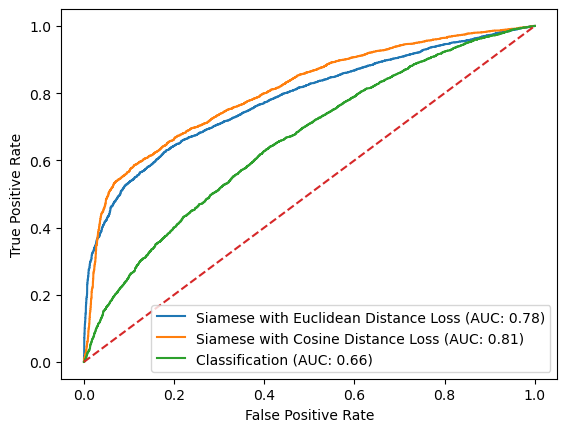

In [27]:
plt.plot(siamese_euclidean_fpr, siamese_euclidean_tpr, label=f"Siamese with Euclidean Distance Loss (AUC: {siamese_euclidean_auc:.2f})")
plt.plot(siamese_cosine_fpr,    siamese_cosine_tpr,    label=f"Siamese with Cosine Distance Loss (AUC: {siamese_cosine_auc:.2f})")
plt.plot(classification_fpr,    classification_tpr,    label=f"Classification (AUC: {classification_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### Find optimal thresholds

In [28]:
import numpy as np

In [29]:
siamese_euclidean_best_threshold_idx = np.argmax(siamese_euclidean_tpr - siamese_euclidean_fpr)
print(f"Siamese with Euclidean Distance Loss best threshold: {siamese_euclidean_thresholds[siamese_euclidean_best_threshold_idx]}")
print(f"Siamese with Euclidean Distance Loss best fpr: {siamese_euclidean_fpr[siamese_euclidean_best_threshold_idx]}")
print(f"Siamese with Euclidean Distance Loss best tpr: {siamese_euclidean_tpr[siamese_euclidean_best_threshold_idx]}")

Siamese with Euclidean Distance Loss best threshold: 1.4633811712265015
Siamese with Euclidean Distance Loss best fpr: 0.18261877172653534
Siamese with Euclidean Distance Loss best tpr: 0.6296213808463251


In [30]:
siamese_cosine_best_threshold_idx = np.argmax(siamese_cosine_tpr - siamese_cosine_fpr)
print(f"Siamese with Cosine Distance Loss best threshold: {siamese_cosine_thresholds[siamese_cosine_best_threshold_idx]}")
print(f"Siamese with Cosine Distance Loss best fpr: {siamese_cosine_fpr[siamese_cosine_best_threshold_idx]}")
print(f"Siamese with Cosine Distance Loss best tpr: {siamese_cosine_tpr[siamese_cosine_best_threshold_idx]}")

Siamese with Cosine Distance Loss best threshold: 0.9580627679824829
Siamese with Cosine Distance Loss best fpr: 0.11170336037079953
Siamese with Cosine Distance Loss best tpr: 0.5859688195991092


In [31]:
classification_best_threshold_idx = np.argmax(classification_tpr - classification_fpr)
print(f"Classification best threshold: {classification_thresholds[classification_best_threshold_idx]}")
print(f"Classification best fpr: {classification_fpr[classification_best_threshold_idx]}")
print(f"Classification best tpr: {classification_tpr[classification_best_threshold_idx]}")

Classification best threshold: 590.21875
Classification best fpr: 0.4122827346465817
Classification best tpr: 0.6405345211581291
